# <center> Remapped Variables into temperature space </center>

The heat budget can written in the familiar form:
\begin{equation}
\frac{\partial T}{\partial t} + \nabla \cdot \textbf{u}T = \frac{\partial Q}{\partial z}
\end{equation}
 Where Q is the surface heat flux. Using a Reynolds decomposition to split the budget into eddy and mean transport terms gives:
 
\begin{equation}
\frac{\partial \overline{v}\overline{T}}{\partial y } + \frac{\partial \overline{w}\overline{T}}{\partial z } + \frac{\partial \overline{v'T'}}{\partial y } + \frac{\partial \overline{w'T'}}{\partial z } = \frac{\partial Q}{\partial z}.
\end{equation}


The $\overline{v'T'}$ and $\overline{w'T'}$ terms can be decomposed into an along-isopycnal term and a remaining vertical component:

\begin{equation}
\left(\overline{v'T'},\overline{w'T'}\right) =  \underbrace{\left(\overline{v'T'}S_p, \overline{w'T'}\right)}_\text{along $\overline{T}$}  + \underbrace{\left(0,\overline{w'T'}- \overline{v'T'}S_p \right)}_\text{remaining vertical}, 
\end{equation}


\begin{equation}
\frac{\partial \overline{v}\overline{T}}{\partial y } + \frac{\partial\overline{w} \overline{T}}{\partial z } + \frac{\partial \overline{v'T'}S_p}{\partial z } + \frac{\partial \overline{v'T'}}{\partial y } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\overline{v'T'}S_p \right)}{\partial z }.
\end{equation}


Putting in terms of streamfunctions:


\begin{equation}
v^* = \frac{\partial \Psi ^*}{\partial z}, \quad w^* = \frac{\partial \Psi ^*}{\partial y} \\ \, \text{ and } \, \\
\overline{v} = \frac{\partial \overline{\Psi } }{\partial z}, \quad \overline {w} = \frac{\partial \overline{\Psi} }{\partial y}.
\end{equation}


\begin{equation}
\frac{\partial \overline{\Psi } }{\partial z}\frac{ \partial \overline{T}}{\partial y } + \frac{\partial \overline{\Psi} }{\partial y} \frac{\partial \overline{T}}{\partial z } + \frac{\partial \Psi ^*}{\partial y}\frac{\partial \overline{T}}{\partial z } + \frac{\partial \Psi ^*}{\partial z}\frac{\partial \overline{T}}{\partial y } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\overline{v'T'}S_p \right)}{\partial z }.
\end{equation}


Residual mean Theroy:


\begin{equation}
\frac{\partial \Psi _{res} }{\partial z} \frac{\partial \overline{T}}{\partial y } + \frac{\partial \Psi _{res} }{\partial y} \frac{\partial \overline{T}}{\partial z } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\overline{v'T'}S_p \right)}{\partial z }.
\end{equation}

Remembering that:

\begin{equation}
\psi ^* = \frac{\overline{w'T'}}{T_{y}}, \quad \quad \psi ^* = \frac{\overline{v'T'}}{T_{z}},
\end{equation}


Is only true  where eddies are adiabatic:



\begin{equation}
\frac{\partial \Psi _{res} }{\partial z} \frac{\partial \overline{T}}{\partial y } + \frac{\partial \Psi _{res} }{\partial y} \frac{\partial \overline{T}}{\partial z } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\Psi ^* T_z S_p \right)}{\partial z }.
\end{equation}


\begin{equation}
S_p = \frac{\frac{\partial T}{\partial y}}{\frac{\partial T}{\partial z}} 
\end{equation}

so simplifies to:


\begin{equation}
\frac{\partial \Psi _{res} }{\partial z} \frac{\partial \overline{T}}{\partial y } + \frac{\partial \Psi _{res} }{\partial y} \frac{\partial \overline{T}}{\partial z } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\Psi ^* T_y \right)}{\partial z }.
\end{equation}



\begin{equation}
S_p = \frac{\partial z}{\partial y} = \frac{Th}{\partial y}
\end{equation}

where Th is layer thickness.


I want to remap into y,T space so we're gonna have to obtain $T_y$ through the chain rule:

\begin{equation}
\frac{ \partial T}{\partial y} = \frac{ \partial z}{\partial y} . \frac{ \partial T}{\partial z}.
\end{equation}

Great we have discrete values already for $\partial T$ and $\partial z$ thats are layers bounds and our layer thickness!

substiuting back in to diabatic eddies deffiniton

\begin{equation}
DE = \overline{w'T'}(y,T) -\Psi ^*.\frac{Th}{\Delta y}. \frac{\Delta T}{Th}
\end{equation}



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pylab import *
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
import SG as SG
import useful as hb
import layers_calc_numba
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [2]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots

In [3]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/Remapped.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

#Eddy ways#


The term $W'T'$ can be calulated:

1. $\overline{WT}$(y,T) - W(y,T) T
2. $W'T'$(y,T) 
3. $\overline{WT}$(y,T) - $\overline{W}\overline{T}$(y,T)


In [5]:
WpTp_L[:,100]

array([  0.00000000e+00,   0.00000000e+00,  -5.88167564e-08,
         6.42314522e-07,   6.42314522e-07,   2.70851212e-06,
         2.70851212e-06,   2.70851212e-06,   2.70851212e-06,
         5.80930587e-06,   5.80930587e-06,   5.80930587e-06,
         5.80930587e-06,   5.57041926e-06,   3.73507494e-06,
         5.67541115e-06,   5.60970545e-06,   6.03783921e-06,
         6.54094789e-06,   8.19549993e-06,   8.19549993e-06,
         8.19549993e-06,   8.19549993e-06,   8.19549993e-06,
         8.19549993e-06,   8.19549993e-06,   4.67355952e-06,
         5.57271062e-06,   6.20097473e-06,   8.71093823e-06,
         8.76718323e-06,   8.76718323e-06,   8.76718323e-06,
         8.76718323e-06,   8.76718323e-06,   7.02800250e-06,
         7.02800250e-06,   7.02800250e-06,   3.97539157e-06,
         1.49544145e-05,   0.00000000e+00,   0.00000000e+00])

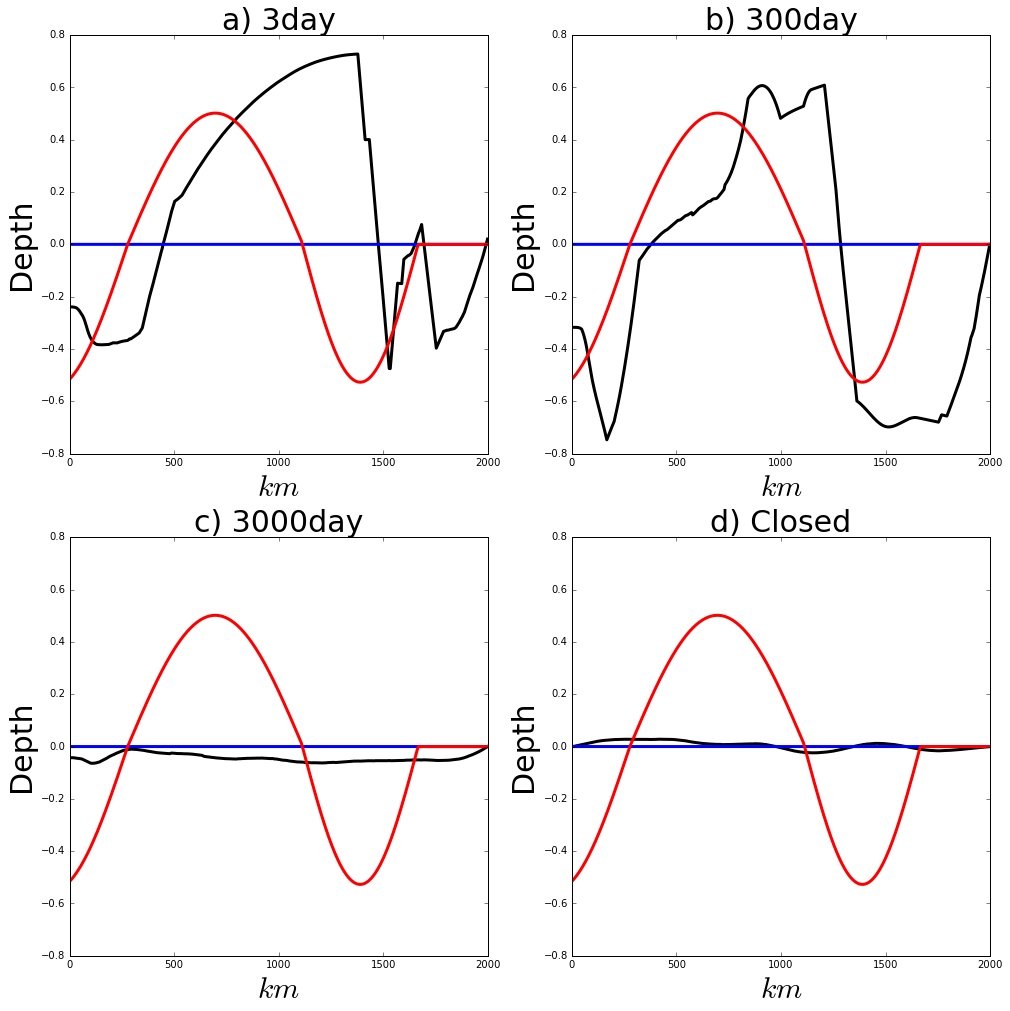

In [4]:
# Method 1
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    ax = fig.add_subplot(2, 2, i+1)
    # File
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc_numba.LayersComputer(c)
    # ROC 
    psi = c.get_psi_iso()
    # Layer probability mask 
    PI = c.mnc('PSI.nc',"LaPs1TH").mean(axis=2)
    PI = ma.masked_array(PI,PI<0.95)
    #psi = ma.masked_array(psi, PI < .98 )
    # Depths
    th = c.mnc('PSI.nc',"LaHs1TH").mean(axis=2)
    depths = np.cumsum(th[::-1],axis=0)[::-1]
    
    #Diabatic Eddy
    WT_L = c.mnc_tl('Remapped.nc',"WT_l").mean(axis=2)
    V_L = c.mnc_tl('Remapped.nc',"V_l").mean(axis=2)
    WTbar_L = c.mnc_tl('Remapped_bar.nc',"WbarTbar_l").mean(axis=2)
    VT_L = c.mnc_tl('Remapped.nc',"VT_l").mean(axis=2)
    VTbar_L = c.mnc_tl('Remapped_bar.nc',"VbarTbar_l").mean(axis=2)
    TH = c.mnc_tl('Remapped.nc',"th").mean(axis=2)
    depths_2 = np.cumsum(th[::-1],axis=0)[::-1]
    T = np.tile(g.glvl,(c.Ny,1)).T
    WpTp_L = WT_L - WTbar_L
        
    # HEAT FLUX
    Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
    Psipred = (Q)/(1000 * 3985)
    # Find Max ROC and depth of diabatic layer
    DDL = np.zeros(len(c.yc)) 
    ROC = np.zeros(len(c.yc)) 
    WT_DL = np.zeros(len(c.yc))
    for jj in range(len(c.yc)):
        if ma.all(PI[:,jj]  == 1)  or np.all(psi[:,jj] == -0) or PI[:,jj].mask.all():
            continue
        indx = ma.nonzero(PI[:,jj]<1)[0]
        b = indx[np.nonzero(indx>3)[0]]
        if len(b)>=2 and (b[1]-b[0])>1:
            a = b[1]
        else:
            a = b[0]
        if a<41 and depths[a-1,jj] - depths[a,jj] > 150:
            a = a-1
        DDL[jj] = depths[a,jj]
        WT_DL[jj] = WpTp_L[a,jj]
        if psi[a,jj]/10**6 > 1.0:
            a = a-1
        ROC[jj] =  np.max(abs(psi[a-3:a+1,jj]))*np.sign(psi[a,jj])
        
    
    ax = fig.add_subplot(2, 2, i+1)
    p = plt.plot(c.yc/1000, SG.savitzky_golay(ROC,31,1)/10**6, 'k', linewidth=3)
    p = plt.plot(c.yc/1000, WT_DL, 'b', linewidth=3)
    q = plt.plot(c.yc/1000, (Psipred/c.dzc[0])*10**6, 'r', linewidth=3)
    plt.ylim(-.8,.8)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel(r'$km$', fontsize=30)
    ax.set_ylabel(r'Depth', fontsize=30)


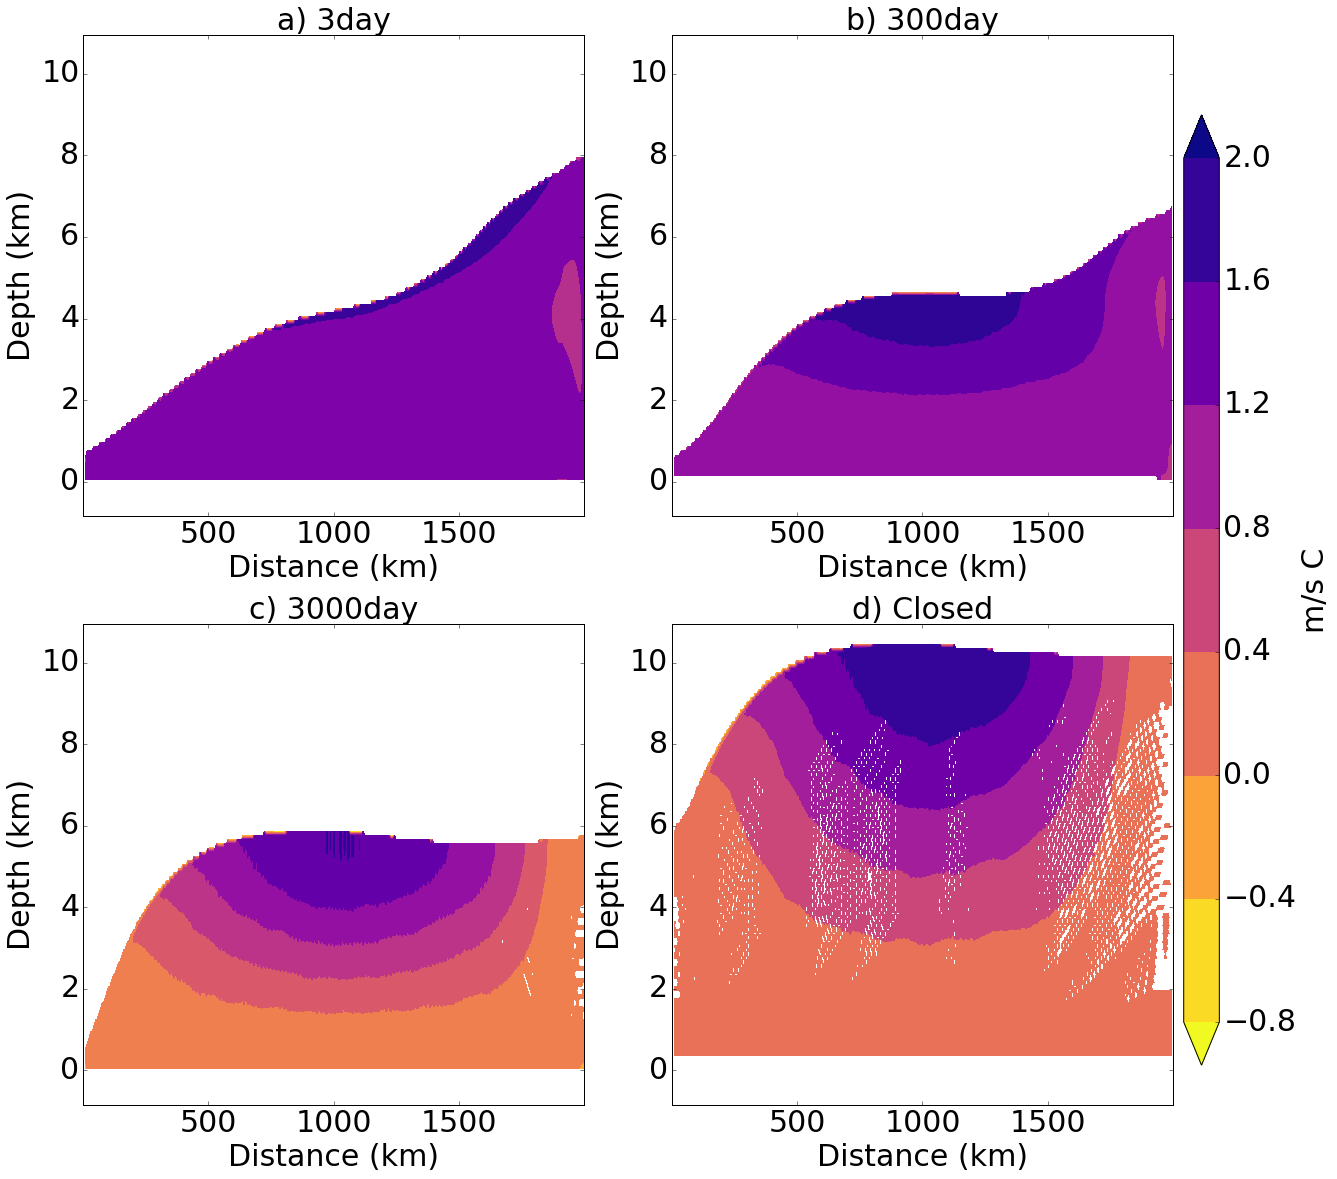

In [12]:
# Method 1
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    ax = fig.add_subplot(2, 2, i+1)
    # File
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc_numba.LayersComputer(c)
    # ROC 
    psi = c.get_psi_iso()
    # Layer probability mask 
    PI = c.mnc('PSI.nc',"LaPs1TH").mean(axis=2)
    PI = ma.masked_array(PI,PI<0.95)
    #psi = ma.masked_array(psi, PI < .98 )
    # Depths
    th = c.mnc('PSI.nc',"LaHs1TH").mean(axis=2)
    depths = np.cumsum(th[::-1],axis=0)[::-1]

        
    # HEAT FLUX
    Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
    Psipred = (Q)/(1000 * 3985)
   
    #Diabatic Eddy
    WT_L = c.mnc_tl('Remapped.nc',"WT_l").mean(axis=2)
    V_L = c.mnc_tl('Remapped.nc',"V_l").mean(axis=2)
    WTbar_L = c.mnc_tl('Remapped_bar.nc',"WbarTbar_l").mean(axis=2)
    VT_L = c.mnc_tl('Remapped.nc',"VT_l").mean(axis=2)
    VTbar_L = c.mnc_tl('Remapped_bar.nc',"VbarTbar_l").mean(axis=2)
    TH = c.mnc_tl('Remapped.nc',"th").mean(axis=2)
    depths_2 = np.cumsum(th[::-1],axis=0)[::-1]
    T = np.tile(g.glvl,(c.Ny,1)).T
    WpTp_L = WT_L - WTbar_L
    VpTp_L = VT_L - VTbar_L
    #V_L = hb.fill_holes(V_L)
    A = (V_L.cumsum(axis=0)*c.Lx/10**6)
    VT=ma.masked_array(VT_L, TH == 0.)
    psi = (-VT.cumsum(axis=0)*c.Lx/10**6)
    # Diabatic eddy
    DT = g.layers_g[0:-1]-g.layers_g[1::]
    D = WpTp_L-VpTp_L*TH/5000
    # Diabatic eddy
    DT = g.layers_g[0:-1]-g.layers_g[1::]
    D = WpTp_L-VpTp_L*TH/5000
    
    p = ax.contourf(c.yc/1000, g.glvl,
                psi, cmap=plt.cm.plasma_r, extend='both')
    
   
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('m/s C', fontsize=30, )
cbar.ax.tick_params(labelsize=30)
    

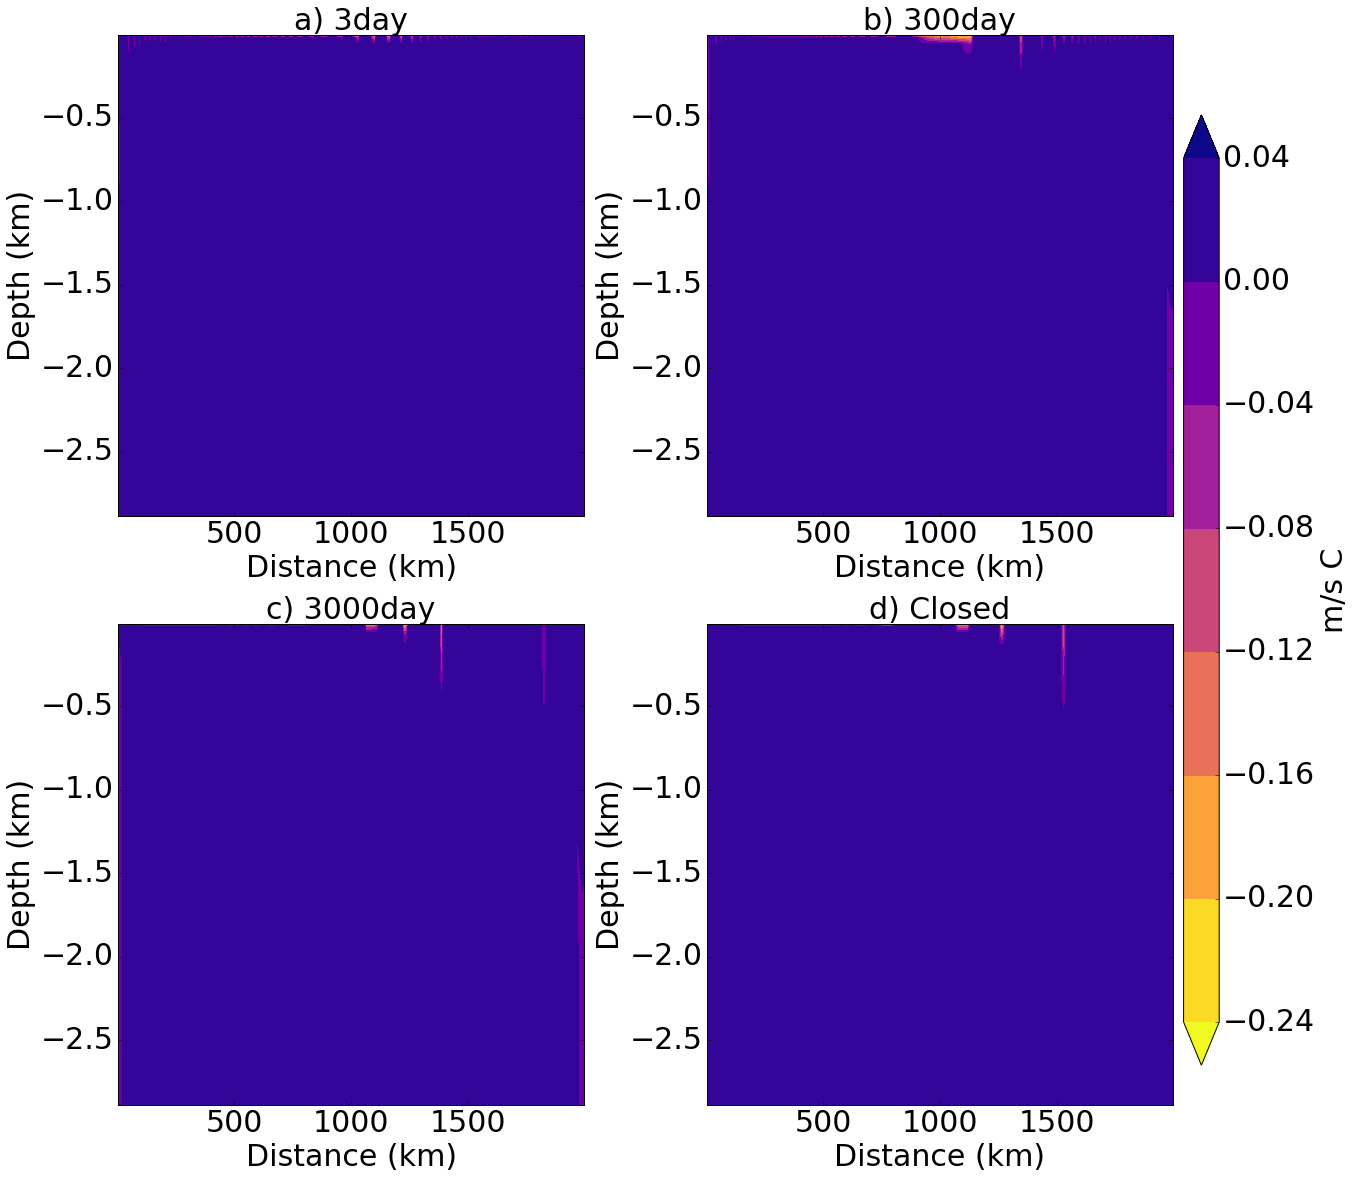

In [24]:
# Method 1
lvls = np.arange(-0.05,0.2,0.005)
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    ax = fig.add_subplot(2, 2, i+1)
    # File
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc_numba.LayersComputer(c)
 
    
    # Horizontal temperature gradient in diabatic layer
    
    
    
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    T = c.mnc('Tav.nc','THETA')
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((1, 0), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    
    #Diabatic Eddy
    WT_L = c.mnc_tl('Remapped.nc',"WT_l").mean(axis=2)
    W_L = c.mnc_tl('Remapped.nc',"W_l").mean(axis=2)
    V_L = c.mnc_tl('Remapped.nc',"V_l").mean(axis=2)
    TH = c.mnc_tl('Remapped.nc',"th").mean(axis=2)
    depths_2 = np.cumsum(th[::-1],axis=0)[::-1]
    T = np.tile(g.glvl,(c.Ny,1)).T
    WpTp_L = WT_L - W_L*T
    V_L = V_L
    VT=ma.masked_array(V_L, TH == 0.)
    psi = (-(VT).cumsum(axis=0)*c.Lx/10**6)
    # Diabatic eddy
    DT = g.layers_g[0:-1]-g.layers_g[1::]
    D = WpTp_L-VpTp_L*TH/5000
    p = ax.contourf(c.yc/1000, c.zc/1000,
                g.transform_g_to_z(psi,TH), cmap=plt.cm.plasma_r, extend='both')
    
   
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('m/s C', fontsize=30, )
cbar.ax.tick_params(labelsize=30)


/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:48: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:48: RuntimeWarning: invalid value encountered in divide


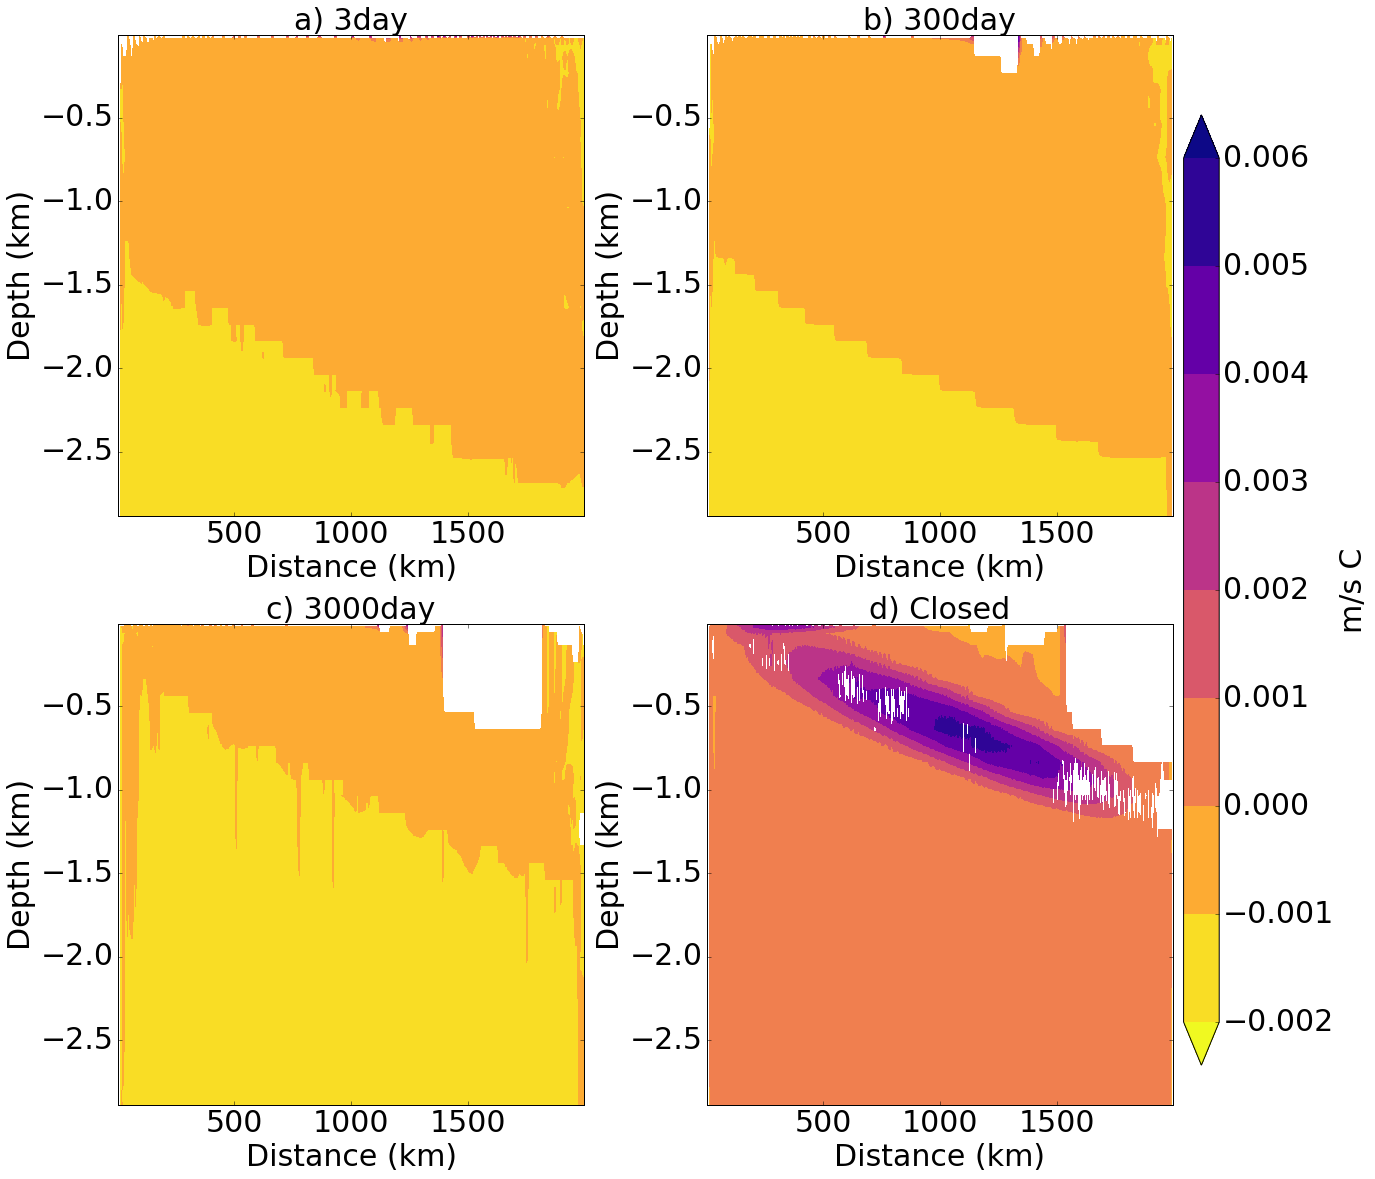

In [22]:
lvls = np.arange(-0.05,0.2,0.005)
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    ax = fig.add_subplot(2, 2, i+1)
    # File
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc_numba.LayersComputer(c)
 
    
    # Horizontal temperature gradient in diabatic layer
    
    
    
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    T = c.mnc('Tav.nc','THETA')
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((1, 0), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    
    #Diabatic Eddy
    WT_L = c.mnc_tl('Remapped.nc',"WT_l").mean(axis=2)
    W_L = c.mnc_tl('Remapped.nc',"W_l").mean(axis=2)
    V_L = c.mnc_tl('Remapped.nc',"V_l").mean(axis=2)
    VTbar_L = c.mnc_tl('Remapped_bar.nc',"VbarTbar_l").mean(axis=2)
    TH = c.mnc_tl('Remapped.nc',"th").mean(axis=2)
    depths_2 = np.cumsum(th[::-1],axis=0)[::-1]
    T = np.tile(g.glvl,(c.Ny,1)).T
    VpTp_L = VT_L - VTbar_L
    VT=ma.masked_array(VpTp_L, TH == 0.)
    psi = (-VT.cumsum(axis=0)*c.Lx/10**6)
    D = WpTp_L-VpTp_L*TH/5000
    # Diabatic eddy
    DT = g.layers_g[0:-1]-g.layers_g[1::]
    D = WpTp_L-VpTp_L/TH
    #D=ma.masked_array(D, TH == 0.)
    psi = (-D.cumsum(axis=0)*c.Lx/10**6)
    p = ax.contourf(c.yc/1000, c.zc/1000,
                g.transform_g_to_z(D,TH), cmap=plt.cm.plasma_r, extend='both')
    
   
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('m/s C', fontsize=30, )
cbar.ax.tick_params(labelsize=30)